# BoxWorld Results

In [2]:
colab = False

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from RelationalModule import ActorCritic
from Utils import train_agent as train
from Utils import utils, test_env
from importlib import reload

NameError: name 'steps' is not defined

## Control agent results

**Results for unboxed gem**

In [4]:
load_dir = "Results/Sandbox/"
queries = ['ohe', 'sandbox']
train_dict = utils.load_session(load_dir, queries)

Number of matching filenames: 1
 ['S_ohe_sandbox_10000-episodes_200-steps_NQBK.npy']


In [5]:
game_params = train_dict['game_params']
HPs = train_dict['HPs']
score = train_dict['score']
keywords = train_dict['keywords']
ID = keywords[-1]

In [6]:
#rnd_mean_score = np.load("Results/BoxWorld/Simplified/mean_score_rnd_agent_unboxed_gem.npy").item()

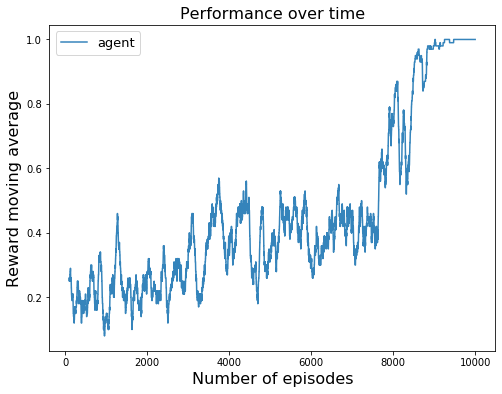

In [8]:
plt.figure(figsize=(8,6))
n_epochs = np.arange(100, len(score))
average_score = np.array([np.mean(score[i:i+100]) for i in range(len(score)-100)])
plt.plot(n_epochs, average_score, alpha=0.9, label='agent')
#plt.axhline(np.mean(score), c='darkorange', label = 'control agent mean')
#plt.axhline(rnd_mean_score, c='r', label = 'random agent mean')
plt.title("Performance over time", fontsize=16)
plt.xlabel("Number of episodes", fontsize=16)
plt.ylabel("Reward moving average", fontsize=16)
plt.legend(fontsize=13)
plt.show()

## Episode rendering


In [10]:
# Load agent 
if colab:
    agent = torch.load(load_dir+"agent_"+ID)
else:
    agent = torch.load(load_dir+"agent_"+ID, map_location=torch.device('cpu'))
    agent.device = 'cpu'

In [11]:
reload(utils)

<module 'Utils.utils' from '/home/nicola/Nicola_unipd/MasterThesis/RelationalDeepRL/Utils/utils.py'>

In [13]:
game_params

{'x': 10,
 'y': 10,
 'initial': [4, 2],
 'goal': [5, 3],
 'max_steps': 200,
 'greyscale_state': True,
 'return_ohe': True}

In [1]:
%matplotlib notebook
initial = [0,0]
goal = [6,7]

game_params['initial'] = initial
game_params['goal'] = goal

env = test_env.Sandbox(**game_params)
utils.render(agent, env)

NameError: name 'game_params' is not defined

## Old plots

In [ ]:
def print_params(params):
    for p in params.keys():
        print(p, params[p])

In [ ]:
# Load data
save_dir = 'Results/BoxWorld/Simplified/'
agent = torch.load(save_dir+"trained_agent2", map_location=torch.device('cpu'))
game_params = np.load(save_dir+"game_params2.npy", allow_pickle=True).item()
HPs = np.load(save_dir+"HP2.npy", allow_pickle=True).item()
score1 = np.load(save_dir+"performance1.npy")
score2 = np.load(save_dir+"performance2.npy")
score = np.concatenate((score1,score2))

In [ ]:
print_params(HPs)

In [ ]:
print_params(game_params)

In [ ]:
def plot_score(score):
    plt.figure(figsize=(8,6))
    n_epochs = np.arange(100, len(score))
    average_score = np.array([np.mean(score[i:i+100]) for i in range(len(score)-100)])
    plt.plot(n_epochs, average_score, alpha=0.9)
    plt.title("Performance over time", fontsize=16)
    plt.xlabel("Number of episodes", fontsize=16)
    plt.ylabel("Reward moving average [last 100]", fontsize=16)
    plt.show()

In [ ]:
plot_score(score)